In [31]:
import numpy as np
import pandas as pd
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_excel('4hourlty_finaldataset.xlsx')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  4226 non-null   object 
 1   To Date    4226 non-null   object 
 2   Temp       4226 non-null   float64
 3   Ozone      4226 non-null   float64
 4   NO2        4226 non-null   float64
 5   AT         4226 non-null   float64
 6   RH         4226 non-null   float64
 7   WS         4226 non-null   float64
 8   WD         4226 non-null   float64
 9   SR         4226 non-null   float64
 10  BP         4226 non-null   float64
dtypes: float64(9), object(2)
memory usage: 363.3+ KB


In [57]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {} 
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x = x + 1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

In [58]:
df = handle_non_numerical_data(df)

In [59]:
df.head()

,From Date,To Date,Temp,Ozone,NO2,AT,RH,WS,WD,SR,BP
0,2077,1783,31.28,19.66,50.76,11.64,94.62,0.81,131.44,12.75,750.94
1,1779,1681,30.17,24.11,36.36,11.09,95.50,0.64,145.25,11.81,750.88
2,1676,1800,28.89,15.12,50.54,13.06,94.94,0.88,192.62,135.25,753.38
3,1796,1826,29.30,17.69,65.05,16.03,83.56,1.90,108.62,221.56,750.94
4,1822,316,28.68,16.93,68.42,13.23,89.56,1.27,93.19,10.31,750.56


In [60]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

In [9]:
#df = remove_outlier(df, 'FAREAMT_BC')

In [61]:
X = df.drop(['From Date','To Date','Temp'], axis=1)
y = df['Ozone']

In [62]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#X

In [63]:
#y = df['FAREAMT_BC'].values

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [65]:
model = Sequential()
model.add(Dense(600, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(400, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
modeldata = model.fit(x_train, y_train, epochs=100, batch_size=50)
model.save("model_4.h5")

Epoch 1/100
3803/3803 [==============================] - 4s 1ms/step - loss: 0.0043
Epoch 2/100
3803/3803 [==============================] - 5s 1ms/step - loss: 0.0078
Epoch 3/100
3803/3803 [==============================] - 4s 1ms/step - loss: 0.0031
Epoch 4/100
3803/3803 [==============================] - 4s 1ms/step - loss: 0.0142
Epoch 5/100
3803/3803 [==============================] - 5s 1ms/step - loss: 0.0052
Epoch 6/100
3803/3803 [==============================] - 5s 1ms/step - loss: 0.0048
Epoch 7/100
3803/3803 [==============================] - 4s 1ms/step - loss: 0.0030
Epoch 8/100
3803/3803 [==============================] - 6s 2ms/step - loss: 0.0032
Epoch 9/100
3803/3803 [==============================] - 6s 1ms/step - loss: 0.0170
Epoch 10/100
3803/3803 [==============================] - 4s 1ms/step - loss: 0.0025
Epoch 11/100
3803/3803 [==============================] - 5s 1ms/step - loss: 0.0045
Epoch 12/100
3803/3803 [==============================] - 5s 1ms/step - lo

3803/3803 [==============================] - 4s 1ms/step - loss: 0.0018
Epoch 96/100
3803/3803 [==============================] - 5s 1ms/step - loss: 0.2147
Epoch 97/100
3803/3803 [==============================] - 5s 1ms/step - loss: 0.0171
Epoch 98/100
3803/3803 [==============================] - 5s 1ms/step - loss: 9.2513e-04
Epoch 99/100
3803/3803 [==============================] - 5s 1ms/step - loss: 4.8989e-04A: 0s - loss: 
Epoch 100/100
3803/3803 [==============================] - 5s 1ms/step - loss: 2.8663e-04


In [37]:
#from keras.models import load_model
#model = load_model('model_3.h5')

In [68]:
results = model.evaluate(x_test, y_test, verbose=1)

423/423 [==============================] - 0s 941us/step


In [69]:
results

0.0004170876466519151

In [70]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=123)
# cvresults = []
# for train, test in kfold.split(X, y):
#     model.fit(X[train], y[train], epochs=500, batch_size=30, verbose=1)
#     results = model.evaluate(X[test], y[test], verbose=1)
#     cvresults.append(results)
# model.save("model_4_improved.h5")

In [71]:
# cvresults

In [72]:
# results = model.evaluate(x_test, y_test, verbose=1)

In [73]:
# results

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(x_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

MAE:  0.013417607458488955
MSE:  0.000417092868521509


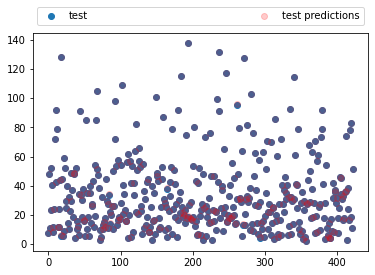

<Figure size 1280x1280 with 0 Axes>

In [75]:
x = [i for i in range(len(y_test))]
plt.scatter(x, y_test, label='test', alpha=1)
plt.scatter(x, y_pred, label='test predictions', color='red', alpha=0.2)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.4)
plt.figure(figsize=(16, 16), dpi=80)
plt.show()